In [131]:
import colorednoise as cn
from matplotlib import mlab
from matplotlib import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.signal import welch, find_peaks
import scipy.stats as st
from sklearn.metrics import r2_score


import numpy as np
import gzip        
import pickle    


In [ ]:
def mesh_index_to_km(x):
    return (x / 900) * 110

def km_to_mesh_index(x):
    return (x / 110) * 900

def get_GL_index(gl_array):
    gl_array = np.array(gl_array).astype(int)
    for i in range(1, len(gl_array)):
        if gl_array[i-1] == 0 and gl_array[i] == 1:
            return i
    return None

In [133]:
variable = "Amin_OG_RNG0"
value = ""

#################################################################################################################################
# Main Path
path = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Dicts_Finest_Mesh_Noise/AminOnly/Seed0_amin_out.gz"
with gzip.open(path, 'rb') as f:
    DATA_dict = pickle.load(f)

# Reference Path
path2 = "/home/kayatroyer/Repositories/brinkmodeltest/Output/Variable_Dictionaries/DATA_Dictionary_2025_10_28__12_36_50.pkl.gz"
with gzip.open(path2, 'rb') as f:
    DATA_dict2 = pickle.load(f)

#################################################################################################################################
data1 = np.loadtxt(
    "/home/kayatroyer/Repositories/brinkmodeltest/NoiseCSVs/nx900_Tests/aminOnly/amin_amax_timeseries_amp1.0_3000yrs_RNG(0)_amin.csv",
    delimiter=",",
    skiprows=1  
)

# data2 = np.loadtxt(
#     "/home/kayatroyer/Repositories/brinkmodeltest/amin_amax_timeseries_amp0.1_2000yrs_RNG(7).csv",
#     delimiter=",",
#     skiprows=1   
# )

In [134]:
bed_dict = DATA_dict['bed_dict']
base_dict = DATA_dict['base_dict']
surf_dict = DATA_dict['surf_dict']
sed_dict = DATA_dict['sed_dict']
H_dict = DATA_dict['H_dict']
us_dict = DATA_dict['us_dict']
ub_dict = DATA_dict['ub_dict']
Hs_dict = DATA_dict['Hs_dict']
GL_dict = DATA_dict['GL_dict']
Qs_dict = DATA_dict['Qs_dict']
SMB_dict = DATA_dict['SMB_dict']
counter_dict = DATA_dict['counter_dict']
final_time = list(GL_dict)[-1]

time = list(GL_dict.keys())
mesh_indices = np.arange(len(GL_dict[time[0]]))
data_matrix = np.array([GL_dict[t] for t in time])
gl_positions = [np.argmax(row > 0.5) for row in data_matrix]
GL_km = mesh_index_to_km(np.array(gl_positions))
peaks, _   = find_peaks(GL_km, prominence=5)
troughs, _ = find_peaks(-GL_km, prominence=5)

periods    = np.diff(np.array(time)[peaks])
adv_dists  = GL_km[peaks]
ret_dists  = GL_km[troughs]

timesteps1 = data1[:,0]
amin_series1 = data1[:,1]
amax_series1 = data1[:,2]
# amin_noise = data1[:,3]
# amax_noise = data1[:,4]
# amin_base = data1[:,5]
# amax_base = data1[:,6]

dt_1 = np.mean(np.diff(timesteps1))
freqs_amin1, Pxx_amin1 = welch(amin_series1, fs=1.0/dt_1, nperseg=min(256, len(amin_series1)))
freqs_amax1, Pxx_amax1 = welch(amax_series1, fs=1.0/dt_1, nperseg=min(256, len(amax_series1)))

print(final_time)


3000.0951273265828


In [135]:
bed_dict2 = DATA_dict2['bed_dict']
base_dict2 = DATA_dict2['base_dict']
surf_dict2 = DATA_dict2['surf_dict']
sed_dict2 = DATA_dict2['sed_dict']
H_dict2 = DATA_dict2['H_dict']
us_dict2 = DATA_dict2['us_dict']
ub_dict2 = DATA_dict2['ub_dict']
Hs_dict2 = DATA_dict2['Hs_dict']
GL_dict2 = DATA_dict2['GL_dict']
Qs_dict2 = DATA_dict2['Qs_dict']
SMB_dict = DATA_dict['SMB_dict']
counter_dict2 = DATA_dict2['counter_dict']
final_time2 = list(GL_dict2)[-1]

time2 = list(GL_dict2.keys())
mesh_indices2 = np.arange(len(GL_dict2[time2[0]]))
data_matrix2 = np.array([GL_dict2[t] for t in time2])
gl_positions2 = [np.argmax(row > 0.5) for row in data_matrix2]
GL_km2 = mesh_index_to_km(np.array(gl_positions2))
peaks2, _   = find_peaks(GL_km2, prominence=5)
troughs2, _ = find_peaks(-GL_km2, prominence=5)

periods2    = np.diff(np.array(time2)[peaks2])
adv_dists2  = GL_km2[peaks2]
ret_dists2  = GL_km2[troughs2]

# timesteps2 = data2[:,0]
# amin_series2 = data2[:,1]
# amax_series2 = data2[:,2]

# dt_2 = np.mean(np.diff(timesteps1))
# freqs_amin2, Pxx_amin2 = welch(amin_series2, fs=1.0/dt_2, nperseg=min(256, len(amin_series2)))
# freqs_amax2, Pxx_amax2 = welch(amax_series2, fs=1.0/dt_2, nperseg=min(256, len(amax_series2)))

print(final_time2)

10000.090896374257


# GL Plot

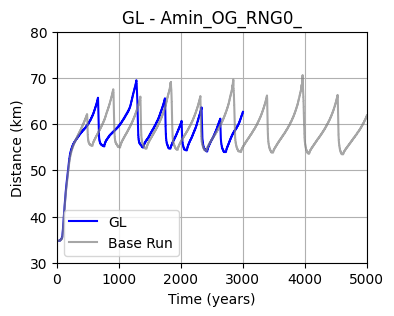

In [152]:
fig, ax = plt.subplots(figsize = (4,3))

# time = np.array(time)+2950
plt.plot(time, GL_km, color = 'blue', label = 'GL')
plt.plot(time2, GL_km2, color = 'gray', label = 'Base Run', alpha = 0.7)

plt.legend(loc = 3)
plt.xlim(0,5000)
plt.ylim(30,80)
plt.xlabel("Time (years)")
plt.ylabel("Distance (km)")
plt.title(f"GL - {variable}_{value}")
plt.grid()
plt.show()

### GL Plot w/ Comparison to Amin and Amax over time

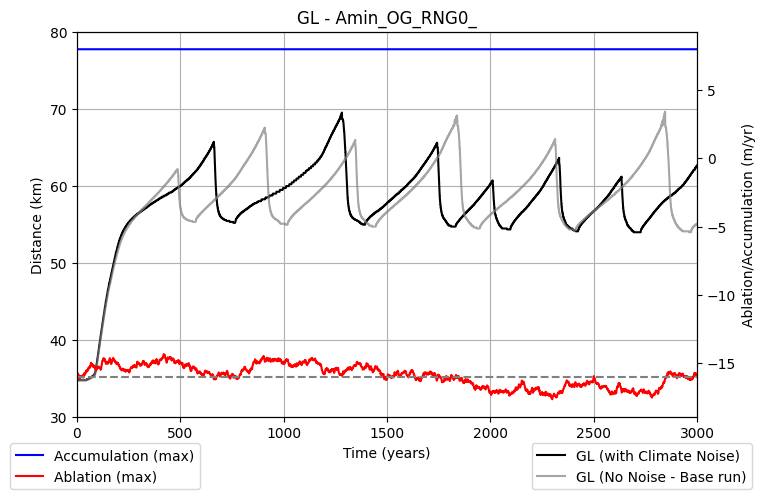

In [153]:
fig, ax = plt.subplots(figsize = (8,5))

ax.plot(time, GL_km, color = 'black', label = 'GL (with Climate Noise)')
ax.plot(time2, GL_km2, color = 'gray', label = 'GL (No Noise - Base run)', alpha = 0.7)

ax2 = ax.twinx()

# timesteps1 = timesteps1 + 2950
ax2.plot(timesteps1, amax_series1, label = 'Accumulation (max)', color = 'blue')
ax2.plot(timesteps1, amin_series1, label = 'Ablation (max)', color = 'red')
# ax2.plot(timesteps1, amax_noise, label = 'Accumulation (noise)', color = 'blue', linestyle = '--')
# ax2.plot(timesteps1, amin_noise, label = 'Ablation (noise)', color = 'red', linestyle = '--')
# ax2.plot(timesteps1, amax_base, label = 'Accumulation (base)', color = 'blue', linestyle = '--')
# ax2.plot(timesteps1, amin_base, label = 'Ablation (base)', color = 'red', linestyle = '--')

# ax.axvline(x=2950, color = 'chocolate', linestyle = ':')
ax2.axhline(y=-16, color = 'grey', linestyle = '--')

ax.legend(bbox_to_anchor=(1.1, -0.05))
ax2.legend(bbox_to_anchor=(.21, -0.05))
ax.set_xlim(0,3000)
ax.set_ylim(30,80)
# ax2.set_ylim(-25,20)
ax.set_xlabel("Time (years)")
ax.set_ylabel("Distance (km)")
ax2.set_ylabel("Ablation/Accumulation (m/yr)")
plt.title(f"GL - {variable}_{value}")
ax.grid()
plt.show()

In [138]:
print("*"*60)
print(f"STATS FOR TEST: {variable} {value}")
print("*"*60)

print("\n" + "="*60)
print("AMIN STATS")
print("="*60)

print(f"Amin (MAX) = {min(amin_series1)}")
print(f"Amin (MIN) = {max(amin_series1)}")
print("")
print(f"Amin (MEAN) = {np.mean(amin_series1)}")
print(f"Amin (STDEV) = {np.std(amin_series1)}")

print("\n" + "="*60)
print("AMAX STATS")
print("="*60)

print(f"Amax (MAX) = {max(amax_series1)}")
print(f"Amax (MIN) = {min(amax_series1)}")
print("")
print(f"Amax (MEAN) = {np.mean(amax_series1)}")
print(f"Amax (STDEV) = {np.std(amax_series1)}")

************************************************************
STATS FOR TEST: Amin_OG_RNG0 
************************************************************

AMIN STATS
Amin (MAX) = -17.658497
Amin (MIN) = -14.366782

Amin (MEAN) = -15.930723088392263
Amin (STDEV) = 0.8012044518996536

AMAX STATS
Amax (MAX) = 8.0
Amax (MIN) = 8.0

Amax (MEAN) = 8.0
Amax (STDEV) = 0.0


In [139]:
# Amax comparison to residual of GL Position 
print("\n" + "="*60)
print("AMAX Comparison to Residual GL Position")
print("="*60)

GL_km2_interp = np.interp(time,time2, GL_km2 )
GL_resid = GL_km-GL_km2_interp

amax_interp = np.interp(time, timesteps1, amax_series1)

r = np.corrcoef(amax_interp, GL_resid)[0,1]
print(f"Correlation Between Amax & GL Trensds (r):  {r}")
r2 = r**2
print(f"The Fraction of Variance in GL Position explained by Amax Noise (r2): \n {r2:.4f} or {(r2*100):.4f}%")
print("")
pearsons_corrcoef, p_corr = st.pearsonr(amax_interp,GL_resid)
print(f"The correlation =  {pearsons_corrcoef:.5f} with a p-value of {(p_corr)}")



# Amin comparison to residual of GL Position 
print("\n" + "="*60)
print("AMIN Comparison to Residual GL Position")
print("="*60)

amin_interp = np.interp(time, timesteps1, amin_series1)

r = np.corrcoef(amin_interp, GL_resid)[0,1]
print(f"Correlation Between Amin & GL Trensds (r):   {r}")
r2 = r**2
print(f"The Fraction of Variance in GL Position explained by Amin Noise (r2): \n {r2:.4f} or {(r2*100):.4f}%")
print("")

pearsons_corrcoef, p_corr = st.pearsonr(amin_interp,GL_resid)
print(f"The correlation =  {pearsons_corrcoef:.5f} with a p-value of {(p_corr)}")



AMAX Comparison to Residual GL Position
Correlation Between Amax & GL Trensds (r):  nan
The Fraction of Variance in GL Position explained by Amax Noise (r2): 
 nan or nan%

The correlation =  nan with a p-value of nan

AMIN Comparison to Residual GL Position
Correlation Between Amin & GL Trensds (r):   0.26586909946613124
The Fraction of Variance in GL Position explained by Amin Noise (r2): 
 0.0707 or 7.0686%

The correlation =  0.26587 with a p-value of 3.210791459927648e-79


/tmp/ipykernel_2131935/3628791668.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsons_corrcoef, p_corr = st.pearsonr(amax_interp,GL_resid)


# Power Spectrum

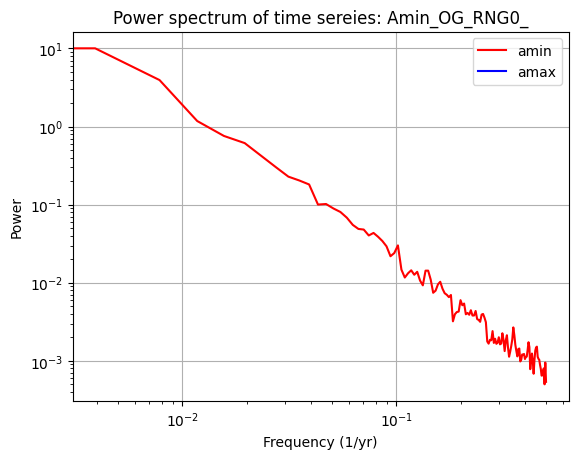

In [140]:
plt.figure()
plt.loglog(freqs_amin1, Pxx_amin1, color = 'red', label = 'amin')
plt.loglog(freqs_amax1, Pxx_amax1, color = 'blue', label = 'amax')
plt.xlabel("Frequency (1/yr)")
plt.ylabel("Power")
plt.title(f"Power spectrum of time sereies: {variable}_{value}")
plt.legend()
plt.grid(True)
plt.show()

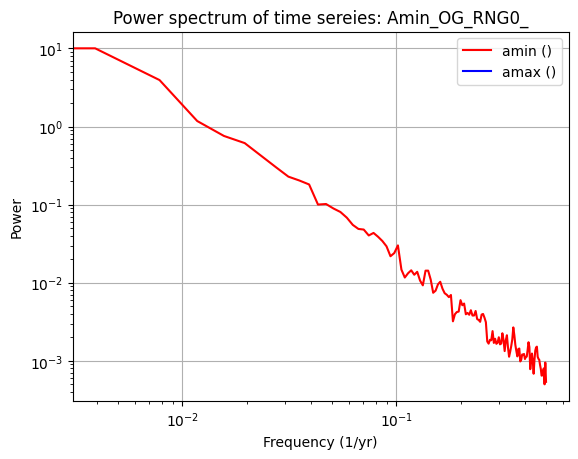

In [141]:
# Original Noise Test
plt.loglog(freqs_amin1, Pxx_amin1, color = 'red', label = f'amin ({value})')
plt.loglog(freqs_amax1, Pxx_amax1, color = 'blue', label = f'amax ({value})')

# Comparison Noise Test
# plt.loglog(freqs_amin2, Pxx_amin2, color = 'red', label = 'amin (Amp=0.1)', alpha = 0.3)
# plt.loglog(freqs_amax2, Pxx_amax2, color = 'blue', label = 'amax (Amp=0.1)', alpha = 0.3)


plt.xlabel("Frequency (1/yr)")
plt.ylabel("Power")
plt.title(f"Power spectrum of time sereies: {variable}_{value}")
plt.legend()
plt.grid(True)
plt.show()

# Velocity

In [142]:
term_surface_velocity = []
term_basal_velocity = []

for t in sorted(us_dict.keys()): 
    us_ = us_dict[t]
    ub_ = ub_dict[t]

    notNAN = np.where(np.isfinite(us_))[0]

    if len(notNAN) > 0:
        terminus = notNAN[-1]
    else:
        terminus = None

    if terminus is not None and terminus >= 75:
        term_usvel = us_[terminus - 75]
        term_ubvel = ub_[terminus - 75]
    else:
        term_usvel = 0
        term_ubvel = 0

    if np.isnan(term_usvel):
        term_usvel = 0
    if np.isnan(term_ubvel):
        term_ubvel = 0

    term_surface_velocity.append(term_usvel)
    term_basal_velocity.append(term_ubvel)

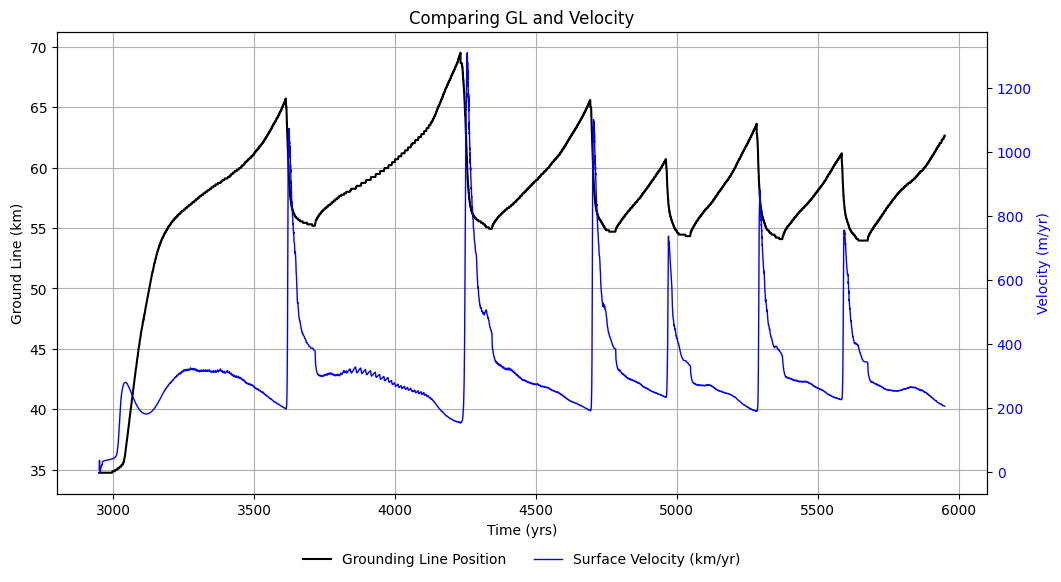

In [143]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# GL position
ax1.plot(time, GL_km, label='Grounding Line Position', color='black')
ax1.set_xlabel("Time (yrs)")
ax1.set_ylabel("Ground Line (km)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid()

# Velocity
ax2 = ax1.twinx()
ax2.plot(time, term_surface_velocity, 'blue', ls = '-', label='Surface Velocity (km/yr)', linewidth = 1)
ax2.set_ylabel("Velocity (m/yr)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)

# ax1.set_xlim(1000,2000)
plt.title("Comparing GL and Velocity" )
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/FinalFigures/40k_default_all.svg", format ="svg", bbox_inches='tight')



# Sediment Flux

Text(0.5, 1.0, 'Sediment Discharge VS GL: Amin_OG_RNG0 ')

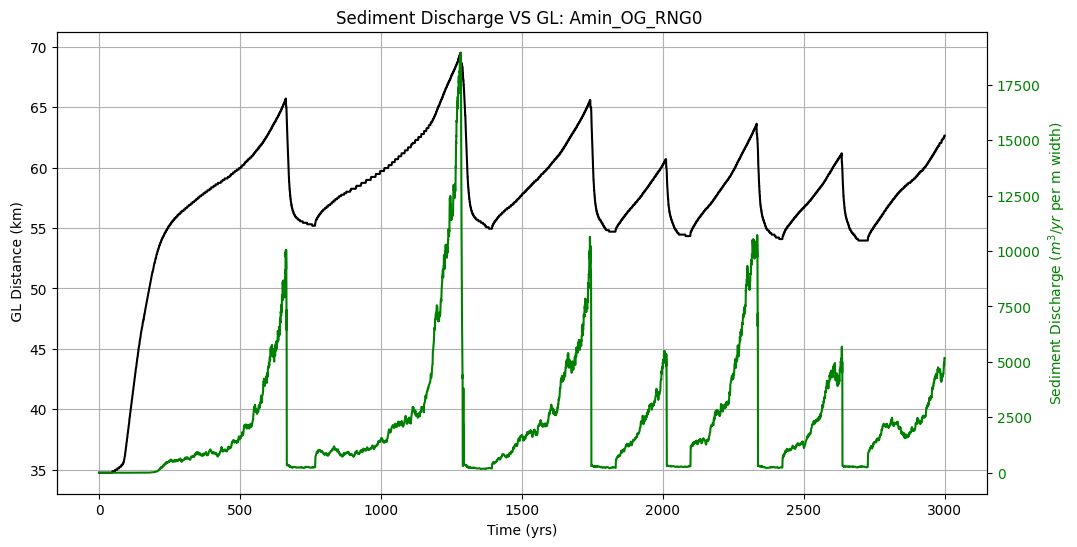

In [144]:
max_Qs = np.array([max(values) for values in Qs_dict.values()])
time = np.array(list(Qs_dict.keys()))


fig, ax1 = plt.subplots(figsize=(12, 6))

# GL position
ax1.plot(time, GL_km, label='Grounding Line Position', color='black')
ax1.set_xlabel("Time (yrs)")
ax1.set_ylabel(f" GL Distance (km)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid()

# Sediment Discharge 
ax2 = ax1.twinx()
ax2.plot(time, max_Qs, 'green', ls = '-')
ax2.set_ylabel("Sediment Discharge ($m^3/yr$ per m width)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# ax1.set_ylim(50,62)
# ax1.set_xlim(1400,1700)
# ax2.set_ylim(0,2000)
plt.title(f"Sediment Discharge VS GL: {variable} {value}")

# Thickness

In [145]:
term_thinning = []
dist_behind_terminus = 50
mask = np.array(time) <= 10000
time_steps = sorted(H_dict.keys())
timesteps = np.array(time)[mask]



for t in time_steps:
    H_ = H_dict[t]

    terminus_indices = np.where(H_ > 1.0)[0]

    if len(terminus_indices) == 0:
        term_thinning.append(np.nan)
        continue

    terminus = terminus_indices[-1]

    if terminus >= dist_behind_terminus:
        term_H = H_[terminus - dist_behind_terminus]
    else:
        term_H = np.nan

    term_thinning.append(term_H)

peaks_gl, _ = find_peaks(GL_km, prominence=6, height=60) 
peaks_gl = np.array(peaks_gl)[mask[peaks_gl]]

peaks_H, _ = find_peaks(term_thinning, prominence=10, height = 600, distance = 500)     
peaks_H = np.array(peaks_H)[mask[peaks_H]]


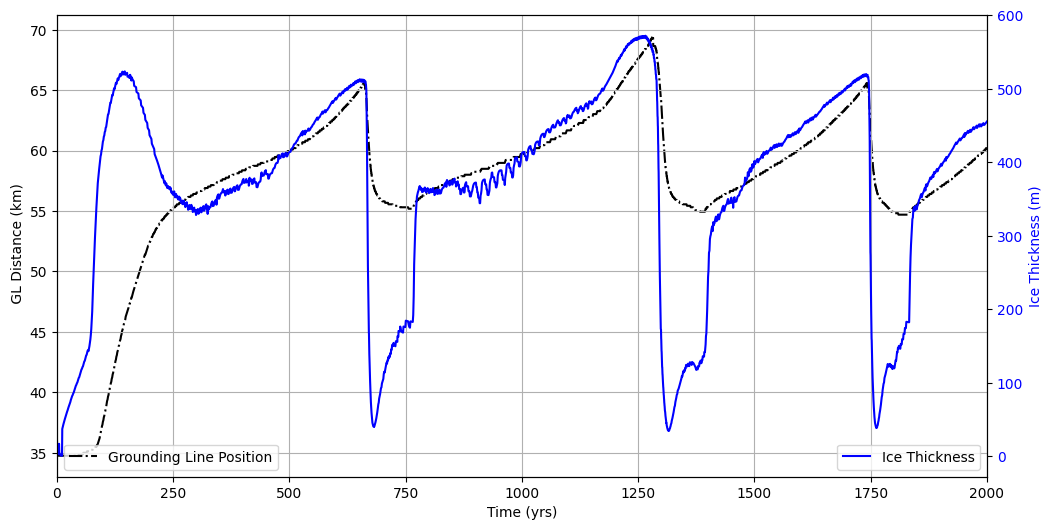

In [146]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_zorder(2)
ax1.patch.set_visible(False)


ax1.plot(time, GL_km, label='Grounding Line Position', ls = 'dashdot', color='black', zorder=1)
# ax1.plot(np.array(time)[peaks_gl], GL_km[peaks_gl], 'ro', label='Maximum Advance', markersize = 10, zorder=10)
ax1.set_xlabel("Time (yrs)")
ax1.set_ylabel(f" GL Distance (km)", color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xlim(0,2000)
ax1.grid()

# Secondary axis for thickness
ax2 = ax1.twinx()
ax2.plot(time_steps, term_thinning, color='blue', linestyle='-', label=f'Ice Thickness', zorder=1)
# ax2.plot(np.array(time_steps)[peaks_H], np.array(term_thinning)[peaks_H], 'go', label='Thickness Peaks', markersize = 10, zorder=10)
ax2.set_ylabel(("Ice Thickness (m)"), color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax2.legend(loc = 4)
ax1.legend(loc = 3)

# plt.title(title_H)
plt.show()

# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/FinalFigures/IceThickness_plot_40k_default.svg", format ="svg", bbox_inches='tight')

# print(f"Thickness Max: {peaks_H[1:]}")
# print(f"GL Max: {peaks_gl}")
# print(peaks_H[1:] - peaks_gl) 

# Bedrock Change

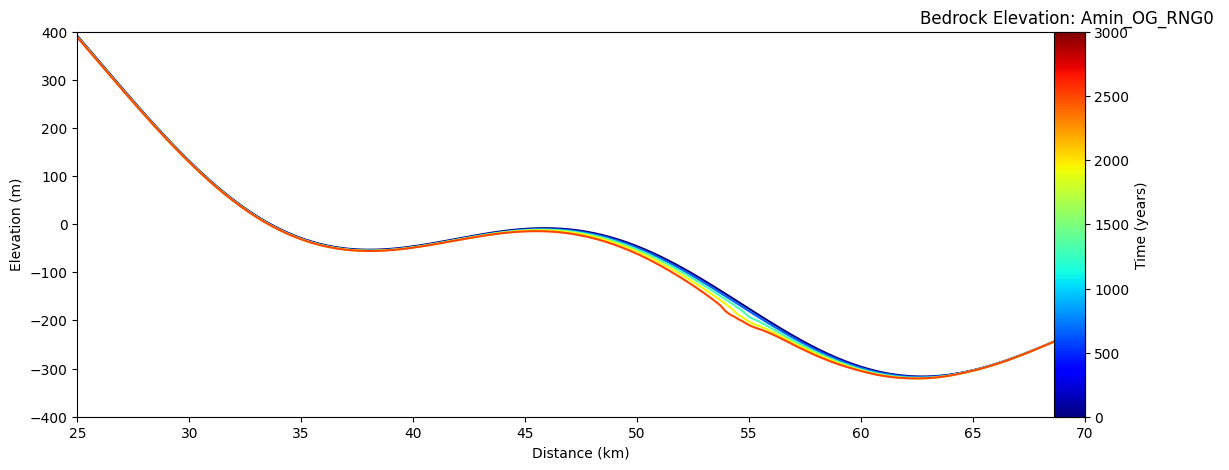

In [147]:
num_points = len(next(iter(bed_dict.values())))
x_km = mesh_index_to_km(np.arange(num_points))
time = list(bed_dict.keys())
norm = plt.Normalize(min(time), max(time))
cmap = cm.jet

fig, ax1 = plt.subplots(figsize=(13,5))

for i, t in enumerate(time):
    if i % 1000 != 0:  
        continue
    bed = bed_dict[t]
    color = cmap(norm(t))
    ax1.plot(x_km, bed, color=color, label=f't={t:.1f}' if i % 25 == 0 else "")

ax1.set_xlabel("Distance (km)")
ax1.set_ylabel("Elevation (m)")
ax1.set_xlim(25, 70)
ax1.set_ylim(-400, 400)

# Make ScalarMappable for colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbaxes = inset_axes(ax1, width="3%", height="100%", loc='upper right',
                    bbox_to_anchor=(0, 0, 1, 1),
                    bbox_transform=ax1.transAxes, borderpad=0.01)

cbar = plt.colorbar(sm, cax=cbaxes)
cbar.set_label('Time (years)')
plt.title(f"Bedrock Elevation: {variable} {value}")
plt.show()


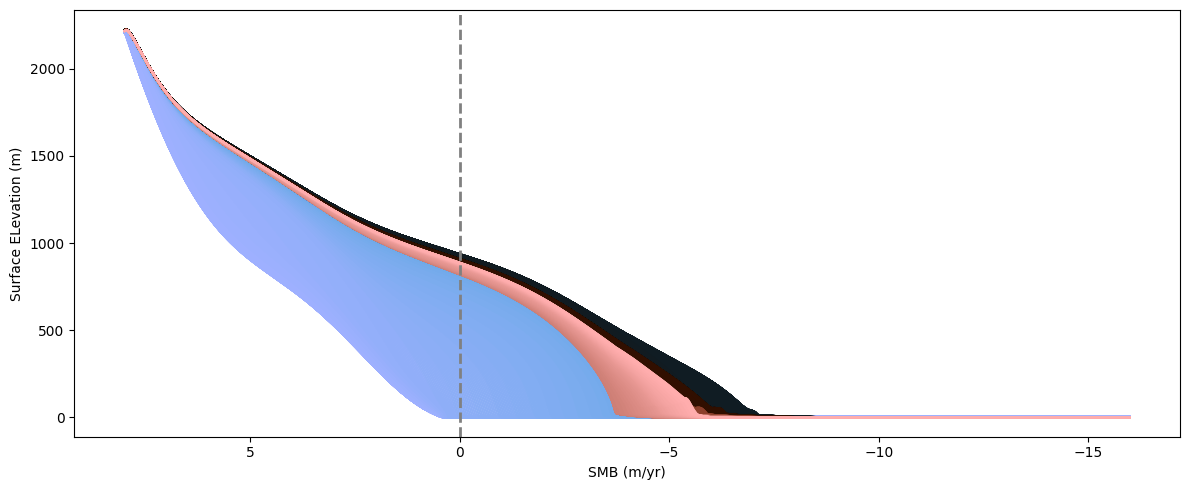

In [148]:
timesteps = sorted(SMB_dict.keys())
smb_profile = SMB_dict[timesteps[0]] 
cmap = cm.berlin

fig,ax  = plt.subplots(figsize=(12,5))


counts = sorted(counter_dict.values())  # all loop counts
sample_counts = counts[::1] 

# make a lookup: loop count → time
loop_to_time = {v: k for k, v in counter_dict.items()}

for j, c in enumerate(sample_counts):
    t = loop_to_time[c]
    surf = surf_dict[t]
    color = cmap(norm(t))
    label = f't={t:.1f}' if j % 5 == 0 else ""
    plt.plot(smb_profile, surf, color=color, label=label)


plt.xlabel("SMB (m/yr)")
plt.ylabel("Surface ELevation (m)")
# plt.title(title_SMB)
plt.gca().invert_xaxis()
# plt.legend(loc="best", fontsize=8)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# plt.colorbar(sm, label='Time (years)', ax=plt.gca())
plt.axvline(x=0, color='gray', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()
# fig.savefig("/media/kayatroyer/KayaDrive/Thesis/Figures/FinalFigures/SMB_plot_40k_default.svg", format ="svg", bbox_inches='tight')

final_smb = list(SMB_dict.values())[-1]
# print(final_smb)

# Amin & Amax Over Time

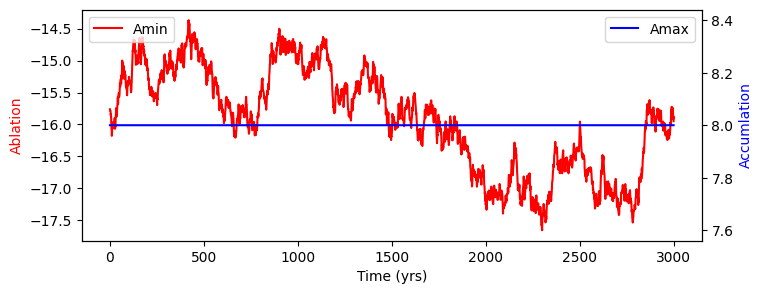

In [149]:
fig, ax = plt.subplots(figsize = (8,3))

ax.plot(timesteps1, amin_series1, color = 'red', label = "Amin")
ax.set_ylabel("Ablation", color = 'red')
ax2 = ax.twinx()
ax2.plot(timesteps1, amax_series1, color = 'blue', label = 'Amax')
ax2.set_ylabel("Accumlation", color = 'blue')
ax.set_xlabel("Time (yrs)")
ax.legend(loc=2)
ax2.legend(loc=1)


# ax.plot(timesteps2, amin_series2, color = 'red')
# ax2 = ax.twinx()
# ax2.plot(timesteps2, amax_series2, color = 'blue')

plt.show()


# Random Tests

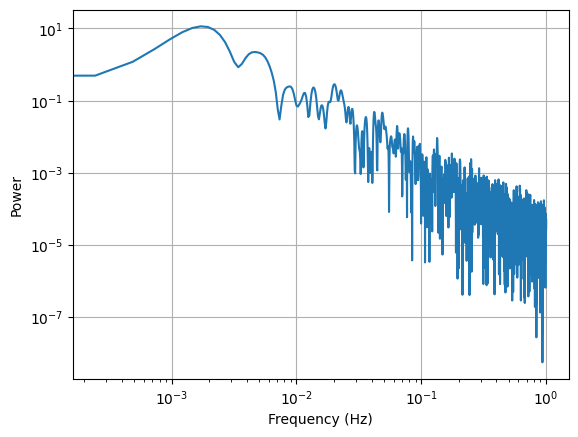

standard dev: 0.7723916756217338
mean: 0.0006784253913261438


In [150]:
rand = np.random.default_rng(7)
beta = 2 # the exponent
samples = 2000 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples, random_state=rand)

# y *= 1.0

s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

print(f"standard dev: {np.std(y)}")
print(f"mean: {np.mean(y)}")

In [151]:
seed = 42
np.random.seed(seed)
beta = 2
t_end = 20

amin_noise = cn.powerlaw_psd_gaussian(beta, t_end)
amax_noise = cn.powerlaw_psd_gaussian(beta, t_end)

amin_noise = (amin_noise - np.mean(amin_noise)) / np.std(amin_noise)
amax_noise = (amax_noise - np.mean(amax_noise)) / np.std(amax_noise)

noise_amplitude = 0.5 # m/yr
amin_noise *= noise_amplitude
amax_noise *= noise_amplitude

print(f"amin noise = {amin_noise}")
print(f"amin noise = {amax_noise}")
print(f"amin mean (-mean & divide by std) = {np.mean(amin_noise)}")
print(f"amax mean (-mean & divide by std) = {np.mean(amax_noise)}")

amin noise = [ 0.15074987  0.37063535  0.67805237  0.49560122  0.23258075  0.33760626
  0.60723928 -0.08966979 -0.14668292 -0.54293994 -1.46053636 -0.64192634
 -0.43225945  0.31850351  0.39543092 -0.41746977 -0.17154138  0.24413116
  0.12991516 -0.0574199 ]
amin noise = [-0.61760558 -0.50445906 -0.53118487 -0.29931306 -0.28989629 -0.4385592
 -0.31713735 -0.29472248 -0.25544389  0.10481337  0.22137929  0.54460953
  0.62396656  0.94880133  1.02859422  0.64068397  0.12182657 -0.08054141
 -0.03475593 -0.57105572]
amin mean (-mean & divide by std) = -1.6653345369377347e-17
amax mean (-mean & divide by std) = 0.0
